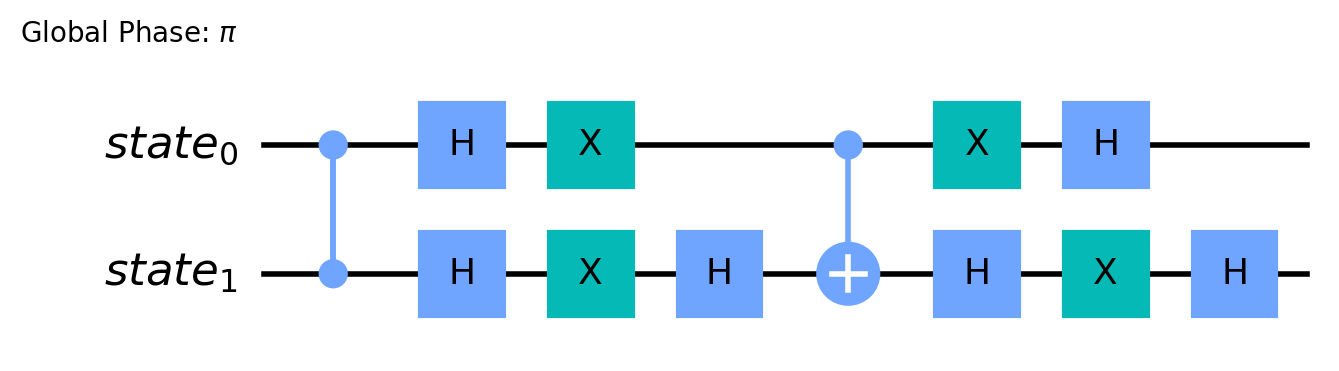

In [1]:
from qiskit import QuantumCircuit
from qiskit.algorithms import AmplificationProblem

# the state we desire to find is '11'
good_state = ['11']

# specify the oracle that marks the state '11' as a good solution
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# define Grover's algorithm
problem = AmplificationProblem(oracle, is_good_state=good_state)

# now we can have a look at the Grover operator that is used in running the algorithm
# (Algorithm circuits are wrapped in a gate to appear in composition as a block
# so we have to decompose() the op to see it expanded into its component gates.)
problem.grover_operator.decompose().draw(output='mpl')

In [2]:
from qiskit.algorithms import Grover
from qiskit.primitives import Sampler


grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print('Result type:', type(result))
print()
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

Result type: <class 'qiskit.algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 11


In [3]:
from qiskit.quantum_info import Statevector
oracle = Statevector.from_label('11')
problem = AmplificationProblem(oracle, is_good_state=['11'])

grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print('Result type:', type(result))
print()
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

Result type: <class 'qiskit.algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 11


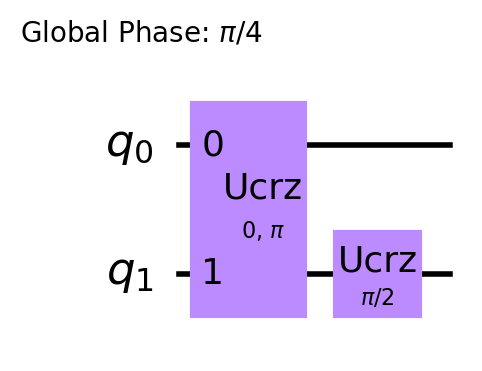

In [4]:
problem.grover_operator.oracle.decompose().draw(output='mpl')

In [5]:
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.exceptions import MissingOptionalLibraryError

# `Oracle` (`PhaseOracle`) as the `oracle` argument
expression = '(a & b)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle)
    display(problem.grover_operator.oracle.decompose().draw(output='mpl'))
except MissingOptionalLibraryError as ex:
    print(ex)

"The 'tweedledum' library is required to use 'PhaseOracle'. You can install it with 'pip install tweedledum'."


state preparation circuit:


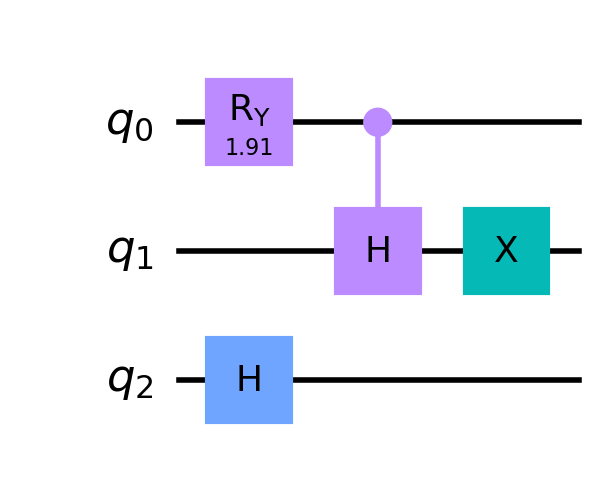

In [6]:
import numpy as np

# Specifying `state_preparation` 
# to prepare a superposition of |01>, |10>, and |11>
oracle = QuantumCircuit(3)
oracle.ccz(0, 1, 2)

theta = 2 * np.arccos(1 / np.sqrt(3))
state_preparation = QuantumCircuit(3)
state_preparation.ry(theta, 0)
state_preparation.ch(0,1)
state_preparation.x(1)
state_preparation.h(2)

# we only care about the first two bits being in state 1, thus add both possibilities for the last qubit
problem = AmplificationProblem(oracle, state_preparation=state_preparation, is_good_state=['110', '111'])

# state_preparation
print('state preparation circuit:')
problem.grover_operator.state_preparation.draw(output='mpl')

In [7]:
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

Success!
Top measurement: 111


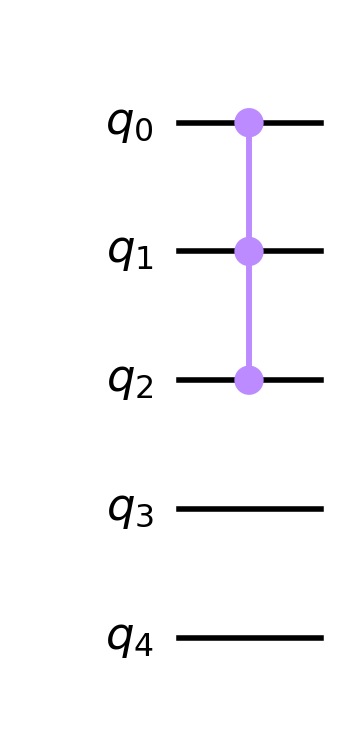

In [8]:
oracle = QuantumCircuit(5)
oracle.ccz(0, 1, 2)
oracle.draw(output='mpl')

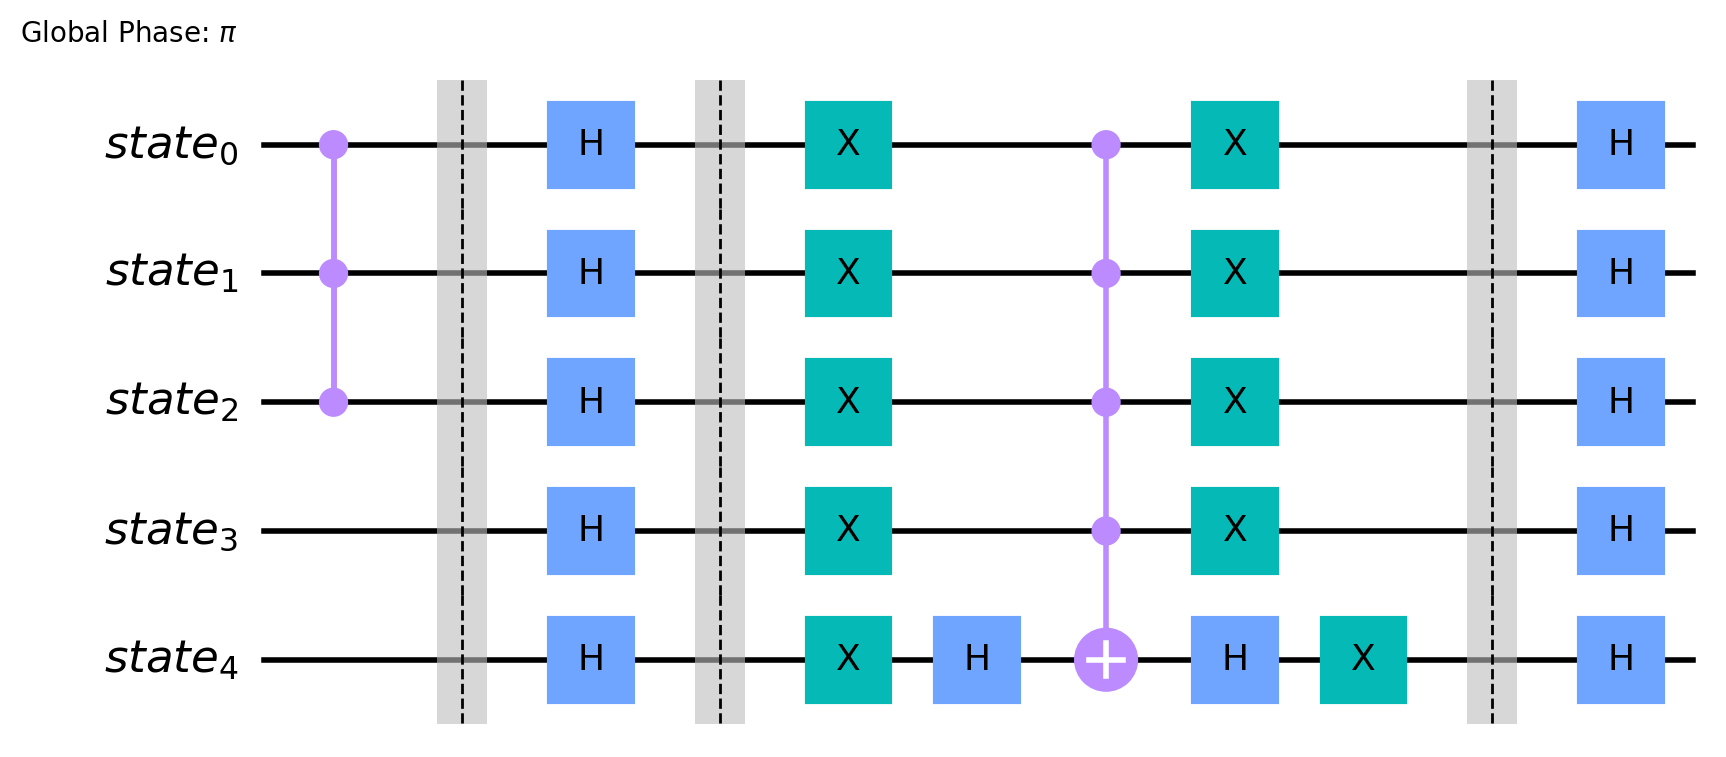

In [9]:
from qiskit.circuit.library import GroverOperator
grover_op = GroverOperator(oracle, insert_barriers=True)
grover_op.decompose().draw(output='mpl')

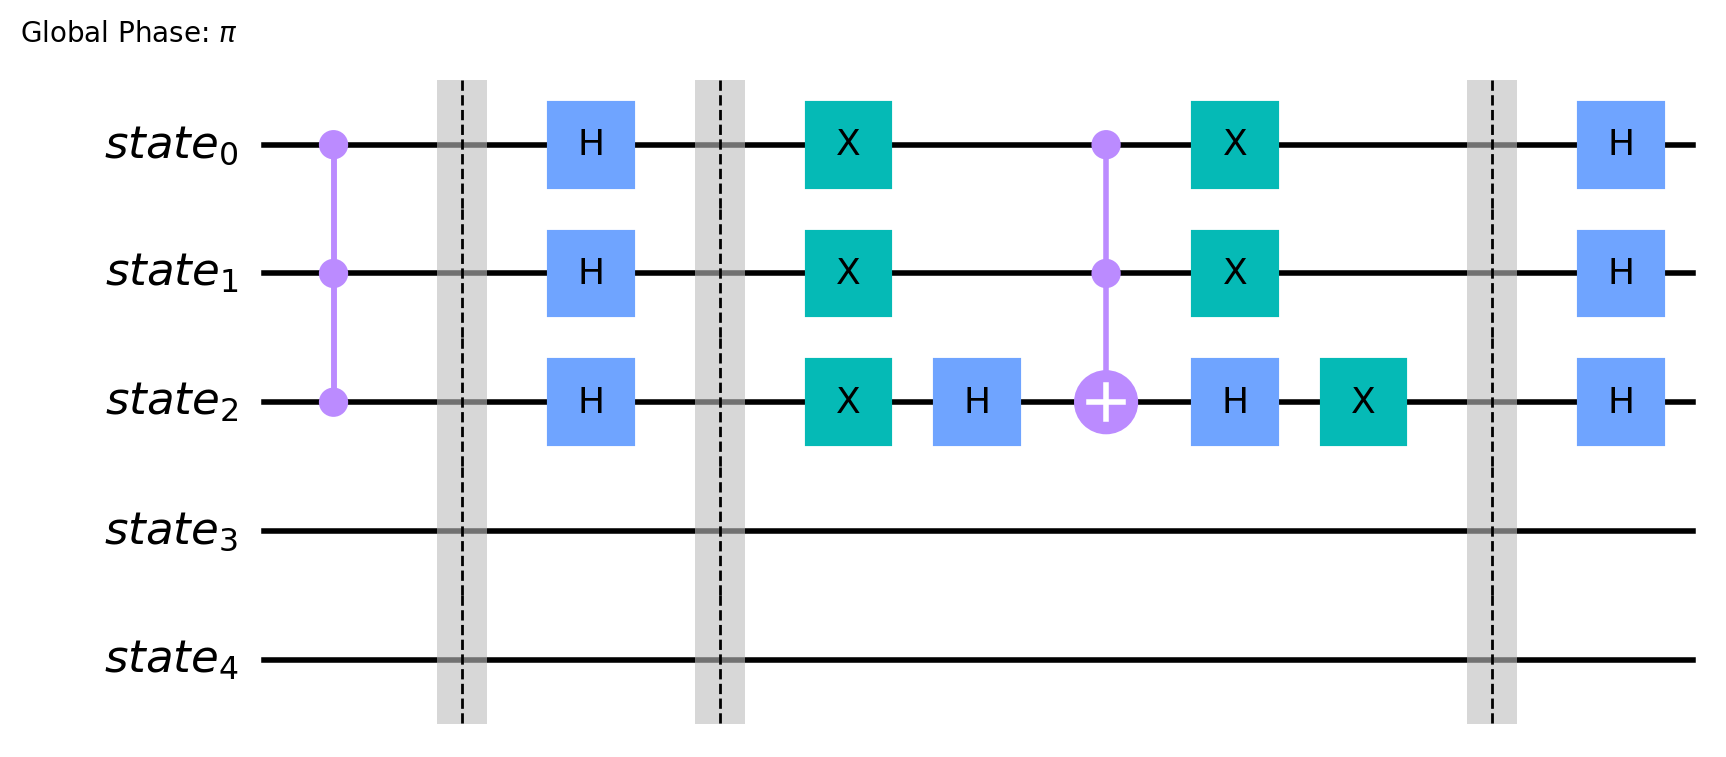

In [10]:
grover_op = GroverOperator(oracle, reflection_qubits=[0, 1, 2], insert_barriers=True)
grover_op.decompose().draw(output='mpl')

In [11]:
# a list of binary strings good state
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = ['11', '00']
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


In [12]:
# a list of integer good state
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = [0, 1]
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


In [13]:
from qiskit.quantum_info import Statevector

# `Statevector` good state
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = Statevector.from_label('11')
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


In [14]:
# Callable good state
def callable_good_state(bitstr):
    if bitstr == "11":
        return True
    return False

oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


In [15]:
# integer iteration
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'])
grover = Grover(iterations=1)

In [16]:
# list iteration
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'])
grover = Grover(iterations=[1, 2, 3])

In [17]:
# using sample_from_iterations
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'])
grover = Grover(iterations=[1, 2, 3], sample_from_iterations=True)

In [18]:
iterations = Grover.optimal_num_iterations(num_solutions=1, num_qubits=8)
iterations

12

In [19]:
def to_DIAMACS_CNF_format(bit_rep):
    return [index+1 if val==1 else -1 * (index + 1) for index, val in enumerate(bit_rep)]

oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'], post_processing=to_DIAMACS_CNF_format)
problem.post_processing([1, 0, 1])

[1, -2, 3]

In [20]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright